# Data Extraction & Data Prep

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
train_labels[0]

1

In [0]:
import numpy as np
def vs(ss,d=10000):
  rs = np.zeros((len(ss),d))
  for i,s in enumerate(ss):
    rs[i, s] = 1
  return rs

In [0]:
x_train = vs(train_data)
x_test = vs(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Model Building

In [0]:
from keras import models
from keras import layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val,y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 2s 143us/step - loss: 0.5198 - acc: 0.7779 - val_loss: 0.3845 - val_acc: 0.8700
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.3092 - acc: 0.9018 - val_loss: 0.3168 - val_acc: 0.8827
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2272 - acc: 0.9264 - val_loss: 0.2817 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1814 - acc: 0.9413 - val_loss: 0.2913 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1487 - acc: 0.9529 - val_loss: 0.3070 - val_acc: 0.8791
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1217 - acc: 0.9640 - val_loss: 0.2922 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1038 - acc: 0.9688 - val_loss: 0.305

# Model Diagnostics

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt
loss_val = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']

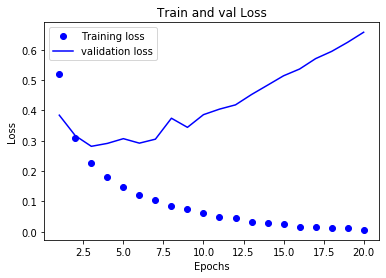

In [29]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss_val,'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title("Train and val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [0]:
acc_val = history_dict['acc']
val_acc = history_dict['val_acc']
acc = history_dict['acc']

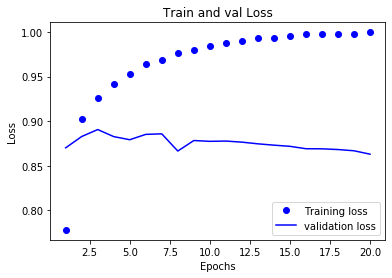

In [32]:
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc_val,'bo', label = 'Training loss')
plt.plot(epochs, val_acc,'b', label = 'validation loss')
plt.title("Train and val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.0077 - acc: 0.9989 - val_loss: 0.6830 - val_acc: 0.8643
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.0061 - acc: 0.9989 - val_loss: 0.7109 - val_acc: 0.8645
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 0.7401 - val_acc: 0.8635
Epoch 4/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0044 - acc: 0.9993 - val_loss: 0.7758 - val_acc: 0.8625
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.0018 - acc: 0.9999 - val_loss: 0.8126 - val_acc: 0.8586
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.0047 - acc: 0.9988 - val_loss: 0.8340 - val_acc: 0.8610
Epoch 7/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.8549 - val_ac

In [34]:
result = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 66us/step


In [35]:
result

[1.2488735016393662, 0.8408]

# Model Predictions

In [36]:
model.predict(x_test)

array([[2.0697713e-04],
       [1.0000000e+00],
       [9.9776304e-01],
       ...,
       [5.1856041e-05],
       [2.8680563e-03],
       [3.9436138e-01]], dtype=float32)